<a href="https://colab.research.google.com/github/ahmadfadhilnugraha/Bank_Beta/blob/main/Sprint_8_Bank_Beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Beta - Indentifying Risky Customers

## Content


1. [Data Pre-processing](#data-pre-processing)

   1.1. [Importing Libraries, Reading, and Checking Data Files](#importing-libraries-reading-and-checking-data-files)

   1.2. [Data Exploration](#data-exploration)

   1.3. [Data Cleaning](#data-cleaning)
2. [Model Training Preparation](#model-training-preparation)

   2.1. [Feature and Target Preparation](#feature-and-target-preparation)

   2.2. [Data Splitting](#data-splitting)

   2.3. [Check Class Imbalance](#check-class-imbalance)

   2.4. [Standardize Data](#standardize-data)

   2.5. [Resampling Data](#resampling-data)

      2.5.1. [Upsampling](#upsampling)
      
      2.5.2. [Downsampling](#downsampling)
3. [Model Training](#model-training)

   3.1. [Sanity Check](#sanity-check)

   3.2. [Model Training - Logistic Regression](#model-training-logistic-regression)

      3.2.1. [Logistic Regression With Balanced Class Weight](#logistic-regression-with-balanced-class-weight)

      3.2.2. [Logistic Regression With Upsampled Class Weight](#logistic-regression-with-upsampled-class-weight)

      3.2.3. [Logistic Regression With Downsampled Class Weight](#logistic-regression-with-downsampled-class-weight)

      3.2.4. [Logistic Regression Training Summary](#logistic-regression-training-summary)

   3.3. [Model Training - Decision Tree](#model-training-decision-tree)

      3.3.1. [Decision Tree With Balanced Class Weight](#decision-tree-with-balanced-class-weight)

      3.3.2. [Decision Tree With Upsampled Class Weight](#decision-tree-with-upsampled-class-weight)

      3.3.3. [Decision Tree With Downsampled Class Weight](#decision-tree-with-downsampled-class-weight)

      3.3.4. [Decision Tree Training Summary](#decision-tree-training-summary)

   3.4. [Model Training - Random Forest](#model-training-random-forest)

      3.4.1. [Random Forest With Balanced Class Weight](#random-forest-with-balanced-class-weight)

      3.4.2. [Random Forest With Upsampled Class Weight](#random-forest-with-upsampled-class-weight)

      3.4.3. [Random Forest With Downsampled Class Weight](#random-forest-with-downsampled-class-weight)

      3.4.4. [Random Forest Training Summary](#random-forest-training-summary)

   3.5. [Final Testing](#final-testing)
4. [Conclusion](#conclusion)

## Introduction



Bank Beta's customers are gradually leaving the company: month by month, their numbers dwindle. Bank employees have realized that it would be more cost-effective for the company to focus on retaining their loyal existing customers rather than acquiring new ones.

In this case, our task is to predict whether a customer is likely to leave the bank soon or not. We have access to data regarding the behavior of past clients and their history of contract terminations with the bank.

We will build a model with the highest possible F1 score. To pass the review, we need a minimum F1 score of 0.59 for the test dataset.

Afterward, we will make any necessary adjustments to our work and submit it for a second review.

Additionally, we will measure the AUC-ROC metric and compare it with the F1 score.

**Goals**

The project aims to develop a predictive model for identifying potential churn among Bank Beta customers, targeting an F1 score of 0.59 on the test dataset. We'll compare this score with the AUC-ROC metric and provide actionable insights for customer retention. Adjustments will be made to enhance model accuracy, and a brief report will be delivered with recommendations for the bank.

**Steps**

1. Data Preparation: Download and prepare the data, explaining the logic used during the preparation process.

2. Check Class Balance: Assess the balance of each class in the dataset. Train the model without considering class imbalances and briefly explain your findings.

3. Model Quality Improvement: Enhance the model's quality using at least two approaches to address class imbalance. Utilize both training and validation sets to find the best model and parameter combinations. Explain your findings briefly. Use the training set to select the best parameters. Improve model quality while considering class imbalance. Train multiple different models and find the best one.

4. Final Testing: Run the final testing phase.

**Data Description**

Data required for this project can be found in the file `/datasets/Churn.csv`. Download the dataset.

**Features:**

- `RowNumber`: Index of string data
- `CustomerId`: Customer ID
- `Surname`: Last name
- `CreditScore`: Credit score
- `Geography`: Country of residence
- `Gender`: Gender
- `Age`: Age
- `Tenure`: Time period for customer's fixed deposit (in years)
- `Balance`: Account balance
- `NumOfProducts`: Number of bank products used by the customer
- `HasCrCard`: Whether the customer has a credit card (1 - yes; 0 - no)
- `IsActiveMember`: Customer's activity level (1 - yes; 0 - no)
- `EstimatedSalary`: Estimated salary

**Target:**

- `Exited`: Whether the customer has churned (1 - yes; 0 - no)


## 1. Data Pre-processing

### 1.1. Importing Libraries, Reading, and Checking Data Files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report, auc
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS/SPRINT_8/Churn.csv')

### 1.2. Data Exploration

In [ ]:
def inspect_df(df):
  print(df.info())
  display(df.head())

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           9091 non-null   float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull().sum()

rownumber            0
customerid           0
surname              0
creditscore          0
geography            0
gender               0
age                  0
tenure             909
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
dtype: int64

<ipython-input-9-b14fab704cc4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


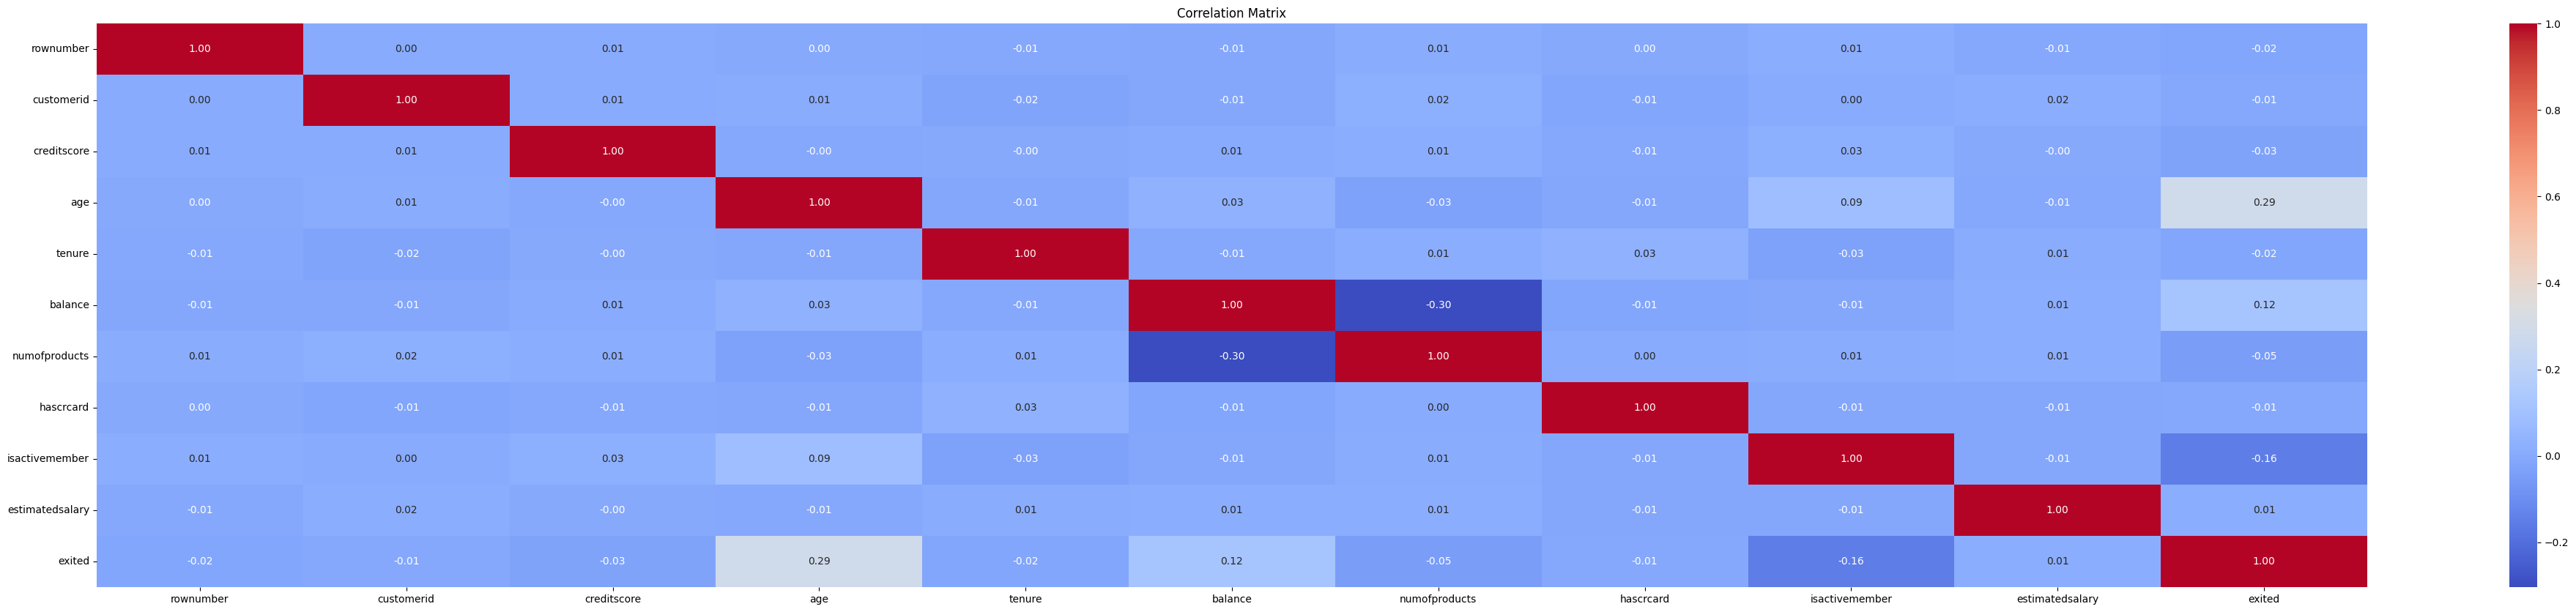

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(50, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Data Exploration Insights:

- The dataset contains 10,000 entries and 14 columns.
- The columns consist of a mix of data types, including integers, floats, and objects (strings).
- The 'tenure' column has missing values, with 9091 non-null entries.
- The 'surname', 'geography', and 'gender' columns are of object type, likely representing categorical variables.
- The 'exited' column appears to be the target variable, indicating whether a customer has churned, with values of 1 for churned and 0 for not churned.

### 1.3. Data Cleaning

In [ ]:
# Check 'tenure' column

missing_tenure_rows = df[df['tenure'].isnull()]
missing_tenure_rows

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


'tenure' column has 909 missing values or about 9% of entire row. This missing values probably caused by data entry error or incomplete records. So for this values we should fill with the median.

In [ ]:
df.loc[df['tenure'].isna(),'tenure'] = df['tenure'].median()

In [ ]:
inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


## 2. Model Training Preparation

### 2.1. Feature and Target Preparation

Column 'rownumber', 'customerid', and 'surname' have no impact for model training, so those columns will not used for features.

In [ ]:
df_new = df.drop(['rownumber', 'customerid', 'surname'], axis=1)

All columns except 'geography' and 'gender' columns are numeric. Both of object type columns has only 3 and 2 unique values. So, one hot encoding method will suitable for encoding this kind of data.

In [ ]:
df_ohe = pd.get_dummies(df_new, drop_first=True)

In [ ]:
inspect_df(df_ohe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   creditscore        10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   tenure             10000 non-null  float64
 3   balance            10000 non-null  float64
 4   numofproducts      10000 non-null  int64  
 5   hascrcard          10000 non-null  int64  
 6   isactivemember     10000 non-null  int64  
 7   estimatedsalary    10000 non-null  float64
 8   exited             10000 non-null  int64  
 9   geography_Germany  10000 non-null  uint8  
 10  geography_Spain    10000 non-null  uint8  
 11  gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB
None


,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


### 2.2. Data Splitting

In [ ]:
target = df_ohe['exited']
features = df_ohe.drop('exited', axis=1)

We will split this data to 3:1:1 ratio (60% for training set, 20% for validation set, and 20% for test set)

In [ ]:
rs = 123

In [ ]:
# first, we split 60% of dataset for training set
features_train, features_x, target_train, target_x  = train_test_split(features, target, test_size=0.4,
                                                                               random_state=rs)

In [ ]:
# we split x_set with ratio 50:50 to get validation set and test set
features_valid, features_test, target_valid, target_test = train_test_split(features_x, target_x, test_size=0.5,
                                                                             random_state=rs)

In [ ]:
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(6000, 11)
(6000,)
(2000, 11)
(2000,)
(2000, 11)
(2000,)


### 2.3. Check Class Imbalance

In [ ]:
def check_imbalace_ratio(target, target_name):
  print(target_name)
  class_distribution = target.value_counts()
  print(class_distribution)
  imbalance_ratio = class_distribution[0] / class_distribution[1]
  print(f'Imbalance Ratio: {round(imbalance_ratio,2)}\n')
  class_distribution.plot(kind='bar')
  plt.xlabel(target_name)
  plt.ylabel('Count')
  plt.title('Distribution of Classes')
  plt.show()

Training Set
0    4761
1    1239
Name: exited, dtype: int64
Imbalance Ratio: 3.84



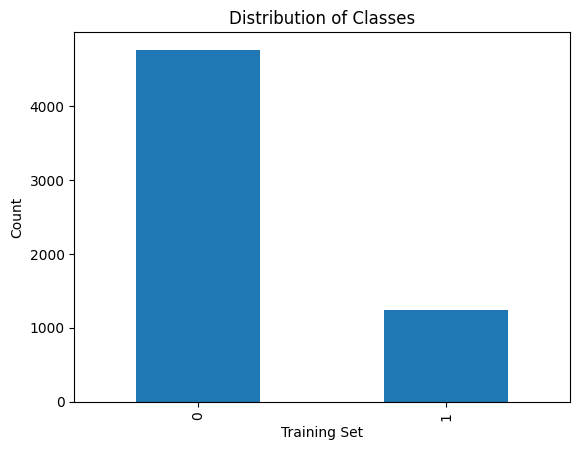

In [ ]:
check_imbalace_ratio(target_train, 'Training Set')

Validation Set
0    1606
1     394
Name: exited, dtype: int64
Imbalance Ratio: 4.08



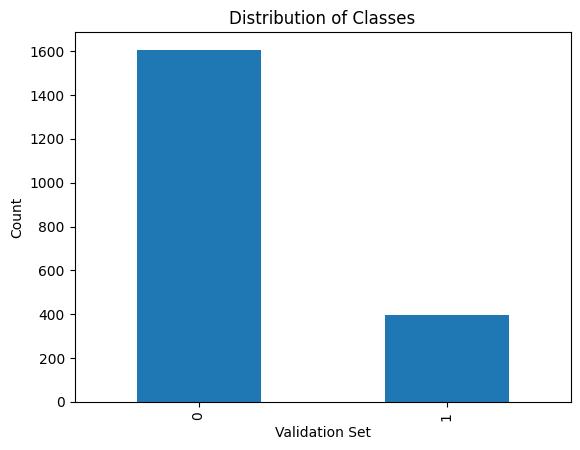

In [ ]:
check_imbalace_ratio(target_valid, 'Validation Set')

Test Set
0    1596
1     404
Name: exited, dtype: int64
Imbalance Ratio: 3.95



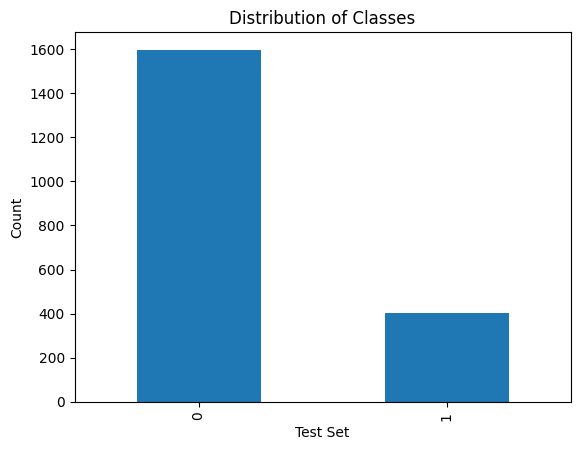

In [ ]:
check_imbalace_ratio(target_test, 'Test Set')

Below graph shown that all target set is imbalance (0 value is 3 times 1 value). To improve this model training result, it needs to be corrected. We will compare the performance of model training with data with class balance correction and without it.

### 2.4. Standarize Data

In [ ]:
numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train.loc[:, numeric] = scaler.transform(features_train.loc[:, numeric])
features_valid.loc[:, numeric] = scaler.transform(features_valid.loc[:, numeric])
features_test.loc[:, numeric] = scaler.transform(features_test.loc[:, numeric])

### 2.5. Resampling Data

#### 2.5.1. Upsampling

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=rs)

    return features_upsampled, target_upsampled

In [ ]:
features_up, target_up = upsample(features_train, target_train, 3)

#### 2.5.2. Downsampling

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=rs)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=rs)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=rs)

    return features_downsampled, target_downsampled

In [ ]:
features_down, target_down = downsample(features_train, target_train, 0.3)

## 3. Model Training

### 3.1. Sanity Check

In [ ]:
target_pred_constant = pd.Series(0, index=target.index)
f1 = f1_score(target, target_pred_constant)
auc_roc = roc_auc_score(target, target_pred_constant)
print('F1 Score is: {:.3f}' .format(f1))
print('AUC-ROC is: {:.3f}'.format(auc_roc))
print('Accuracy is: {:.3f}'.format(sklearn.metrics.accuracy_score(target, target_pred_constant)))

F1 Score is: 0.000
AUC-ROC is: 0.500
Accuracy is: 0.796


### 3.2. Model Training - Logistic Regression

In [ ]:
#initialize logistic regression classifier
lr_classifier = LogisticRegression(random_state=rs)

In [ ]:
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [ ]:
# Initialize GridSearchCV
lr_grid_search = GridSearchCV(lr_classifier, lr_param_grid, cv=5, scoring='f1')

In [ ]:
# Perform grid search to find the best hyperparameters
lr_grid_search.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=123),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1')

In [ ]:
lr_best_params = lr_grid_search.best_params_
print("Best Hyperparameters for Logistic Regression:", lr_best_params)

Best Hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# Use the best hyperparameters to train the model
lr_classifier = lr_grid_search.best_estimator_
lr_classifier.fit(features_train, target_train)

LogisticRegression(C=10, penalty='l1', random_state=123, solver='liblinear')

In [ ]:
# Predict the labels for the validation set using the best model
lr_val_pred = lr_classifier.predict(features_valid)

In [ ]:
def model_report(y_true, y_pred):
  f1 = round(f1_score(y_true, y_pred), 4)
  roc_auc = round(roc_auc_score(y_true, y_pred), 4)
  accuracy = round(accuracy_score(y_true, y_pred), 4)
  report = classification_report(y_true, y_pred)

  print("F1 Score:", f1)
  print("ROC AUC Score:", roc_auc)
  print("Accuracy:", accuracy)
  print()
  print("Classification Report:")
  print(report)

In [ ]:
# calculate f1, roc-auc, and accuracy of the model
model_report(target_valid, lr_val_pred)

F1 Score: 0.2819
ROC AUC Score: 0.5762
Accuracy: 0.8115

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1606
           1       0.56      0.19      0.28       394

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



#### 3.2.1. Logistic Regression With Balanced Class Weight

In [ ]:
#initialize logistic regression classifier with balanced class weight
lr_classifier_balanced = LogisticRegression(class_weight='balanced', random_state=rs)

In [ ]:
# Initialize GridSearchCV
lr_grid_search_balanced = GridSearchCV(lr_classifier_balanced, lr_param_grid, cv=5, scoring='f1')

In [ ]:
# Perform grid search to find the best hyperparameters
lr_grid_search_balanced.fit(features_train, target_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=123),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1')

In [ ]:
lr_best_params_balanced = lr_grid_search_balanced.best_params_
print("Best Hyperparameters for Logistic Regression:", lr_best_params_balanced)

Best Hyperparameters for Logistic Regression: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
lr_classifier_balanced = lr_grid_search_balanced.best_estimator_
lr_classifier_balanced.fit(features_train, target_train)

LogisticRegression(C=0.001, class_weight='balanced', random_state=123,
                   solver='liblinear')

In [ ]:
lr_val_pred_balanced = lr_classifier_balanced.predict(features_valid)

In [ ]:
model_report(target_valid, lr_val_pred_balanced)

F1 Score: 0.473
ROC AUC Score: 0.6907
Accuracy: 0.7125

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1606
           1       0.37      0.65      0.47       394

    accuracy                           0.71      2000
   macro avg       0.63      0.69      0.64      2000
weighted avg       0.79      0.71      0.74      2000



#### 3.2.2. Logistic Regression With Upsampled Class Weight

In [ ]:
lr_grid_search.fit(features_up, target_up)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=123),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1')

In [ ]:
lr_best_params_up = lr_grid_search.best_params_
print("Best Hyperparameters for Logistic Regression:", lr_best_params_up)

Best Hyperparameters for Logistic Regression: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
lr_classifier_up = lr_grid_search.best_estimator_
lr_classifier_up.fit(features_up, target_up)

LogisticRegression(C=0.001, penalty='l1', random_state=123, solver='liblinear')

In [ ]:
lr_val_pred_up = lr_classifier_up.predict(features_valid)

In [ ]:
model_report(target_valid, lr_val_pred_up)

F1 Score: 0.4678
ROC AUC Score: 0.6953
Accuracy: 0.669

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1606
           1       0.34      0.74      0.47       394

    accuracy                           0.67      2000
   macro avg       0.63      0.70      0.61      2000
weighted avg       0.80      0.67      0.70      2000



#### 3.3.3. Logistic Regression With Downsampled Class Weight

In [ ]:
lr_grid_search.fit(features_down, target_down)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=123),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1')

In [ ]:
lr_best_params_down = lr_grid_search.best_params_
print("Best Hyperparameters for Logistic Regression:", lr_best_params_down)

Best Hyperparameters for Logistic Regression: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
lr_classifier_down = lr_grid_search.best_estimator_
lr_classifier_down.fit(features_down, target_down)

LogisticRegression(C=0.01, penalty='l1', random_state=123, solver='liblinear')

In [ ]:
lr_val_pred_down = lr_classifier_down.predict(features_valid)

In [ ]:
model_report(target_valid, lr_val_pred_down)

F1 Score: 0.4857
ROC AUC Score: 0.6964
Accuracy: 0.7385

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1606
           1       0.40      0.63      0.49       394

    accuracy                           0.74      2000
   macro avg       0.64      0.70      0.66      2000
weighted avg       0.80      0.74      0.76      2000



#### 3.3.4. Logistic Regression Training Summary

The logistic regression model training resulted in an F1 score of 0.2819 and an ROC AUC score of 0.5762. These values did not meet our target, where we aim for an F1 score of 0.59. Therefore, I applied class weight balancing techniques and achieved an F1 score of 0.473 and an ROC AUC score of 0.6907. Although these scores improved from the model before class weight balancing, they still did not meet our target.

We also experimented with modeling using upsampled and downsampled class weights. For the model with upsampled class weights, we obtained an F1 score of 0.4678 and an ROC AUC score of 0.6953. For the model with downsampled class weights, we achieved an F1 score of 0.4857 and an ROC AUC score of 0.6964.

So far, the model with downsampled class weights has yielded the best F1 and AUC ROC scores, but it still falls short of our target. Next, we will train models using decision trees and random forests.

### 3.3. Model Training - Decision Tree

In [ ]:
# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=rs)

In [ ]:
dt_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [ ]:
# Initialize GridSearchCV
dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=5, scoring='f1')

In [ ]:
# Perform grid search to find the best hyperparameters
dt_grid_search.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [ ]:
dt_best_params = dt_grid_search.best_params_
print("Best Hyperparameters:", dt_best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [ ]:
# Train the decision tree classifier
dt_classifier = dt_grid_search.best_estimator_
dt_classifier.fit(features_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=123)

In [ ]:
# Predict the labels for the validation set
dt_val_pred = dt_classifier.predict(features_valid)

In [ ]:
model_report(target_valid, dt_val_pred)

F1 Score: 0.5538
ROC AUC Score: 0.7084
Accuracy: 0.8485

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1606
           1       0.66      0.48      0.55       394

    accuracy                           0.85      2000
   macro avg       0.77      0.71      0.73      2000
weighted avg       0.84      0.85      0.84      2000



#### 3.3.1. Decision Tree With Balanced Class Weight

In [ ]:
dt_classifier_balanced = DecisionTreeClassifier(class_weight='balanced', random_state=rs)

In [ ]:
dt_grid_search_balanced = GridSearchCV(dt_classifier_balanced, dt_param_grid, cv=5, scoring='f1')

In [ ]:
dt_grid_search_balanced.fit(features_train, target_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [ ]:
dt_best_params_balanced = dt_grid_search_balanced.best_params_
print("Best Hyperparameters:", dt_best_params_balanced)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [ ]:
dt_classifier_balanced = dt_grid_search_balanced.best_estimator_
dt_classifier_balanced.fit(features_train, target_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_split=5, random_state=123)

In [ ]:
dt_val_pred_balanced = dt_classifier_balanced.predict(features_valid)

In [ ]:
model_report(target_valid, dt_val_pred_balanced)

F1 Score: 0.5451
ROC AUC Score: 0.7444
Accuracy: 0.768

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1606
           1       0.44      0.71      0.55       394

    accuracy                           0.77      2000
   macro avg       0.68      0.74      0.69      2000
weighted avg       0.82      0.77      0.79      2000



#### 3.3.2. Decision Tree With Upsampled Class Weight

In [ ]:
dt_grid_search.fit(features_up, target_up)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [ ]:
dt_best_params_up = dt_grid_search.best_params_
print("Best Hyperparameters:", dt_best_params_up)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
dt_classifier_up = dt_grid_search.best_estimator_
dt_classifier_up.fit(features_up, target_up)

DecisionTreeClassifier(random_state=123)

In [ ]:
dt_val_pred_up = dt_classifier_up.predict(features_valid)

In [ ]:
model_report(target_valid, dt_val_pred_up)

F1 Score: 0.4968
ROC AUC Score: 0.6871
Accuracy: 0.8005

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1606
           1       0.49      0.50      0.50       394

    accuracy                           0.80      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.80      0.80      0.80      2000



#### 3.3.3. Decision Tree With Downsampled Class Weight

In [ ]:
dt_grid_search.fit(features_down, target_down)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [ ]:
dt_best_params_down = dt_grid_search.best_params_
print("Best Hyperparameters:", dt_best_params_down)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
dt_classifier_down = dt_grid_search.best_estimator_
dt_classifier_down.fit(features_down, target_down)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10, random_state=123)

In [ ]:
dt_val_pred_down = dt_classifier_down.predict(features_valid)

In [ ]:
model_report(target_valid, dt_val_pred_down)

F1 Score: 0.5585
ROC AUC Score: 0.7549
Accuracy: 0.7755

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1606
           1       0.46      0.72      0.56       394

    accuracy                           0.78      2000
   macro avg       0.69      0.75      0.70      2000
weighted avg       0.83      0.78      0.79      2000



#### 3.3.4. Decision Tree Training Summary

The decision tree model training resulted in an F1 score of 0.5538 and an ROC AUC score of 0.7084. These scores still did not meet our target. After applying class weight balancing, the F1 score decreased to 0.5451, but the ROC AUC score increased to 0.7444.

Using upsampled class weights further decreased the F1 score to 0.4968, with the ROC AUC score also decreasing to 0.6871. However, when using downsampled class weights, the F1 score improved to 0.5585, which is better than the other approaches. The ROC AUC score for this model was 0.7549.

Although the F1 and ROC AUC scores improved significantly with downsampled class weights, they still fall below our target. Next, we will proceed with training using Random Forest.

### 3.4. Model Training - Random Forest

In [ ]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=rs)

In [ ]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
# Initialize GridSearchCV
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5, scoring='f1')

In [ ]:
# Perform grid search to find the best hyperparameters
rf_grid_search.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [ ]:
rf_best_params = rf_grid_search.best_params_
print("Best Hyperparameters for Random Forest:", rf_best_params)

Best Hyperparameters for Random Forest: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
# Use the best hyperparameters to train the model
rf_classifier = rf_grid_search.best_estimator_
rf_classifier.fit(features_train, target_train)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=2,
                       n_estimators=300, random_state=123)

In [ ]:
# Predict the labels for the validation set using the best model
rf_val_pred = rf_classifier.predict(features_valid)

In [ ]:
model_report(target_valid, rf_val_pred)

F1 Score: 0.5776
ROC AUC Score: 0.7161
Accuracy: 0.864

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1606
           1       0.74      0.47      0.58       394

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



#### 3.4.1. Random Forest With Balanced Class Weight

In [ ]:
# Initialize the Random Forest classifier
rf_classifier_balanced = RandomForestClassifier(class_weight='balanced', random_state=rs)

In [ ]:
# Initialize GridSearchCV
rf_grid_search_balanced = GridSearchCV(rf_classifier_balanced, rf_param_grid, cv=5, scoring='f1')

In [ ]:
# Perform grid search to find the best hyperparameters
rf_grid_search_balanced.fit(features_train, target_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=123),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [ ]:
rf_best_params_balanced = rf_grid_search_balanced.best_params_
print("Best Hyperparameters for Random Forest:", rf_best_params_balanced)

Best Hyperparameters for Random Forest: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


In [ ]:
# Use the best hyperparameters to train the model
rf_classifier_balanced = rf_grid_search_balanced.best_estimator_
rf_classifier_balanced.fit(features_train, target_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300, random_state=123)

In [ ]:
# Predict the labels for the validation set using the best model
rf_val_pred_balanced = rf_classifier_balanced.predict(features_valid)

In [ ]:
model_report(target_valid, rf_val_pred_balanced)

F1 Score: 0.6356
ROC AUC Score: 0.7909
Accuracy: 0.8395

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      1606
           1       0.57      0.71      0.64       394

    accuracy                           0.84      2000
   macro avg       0.75      0.79      0.77      2000
weighted avg       0.86      0.84      0.85      2000



#### 3.4.2. Random Forest With Upsampled Class Weight

In [ ]:
rf_grid_search.fit(features_up, target_up)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [ ]:
rf_best_params_up = rf_grid_search.best_params_
print("Best Hyperparameters for Random Forest:", rf_best_params_up)

Best Hyperparameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
rf_classifier_up = rf_grid_search.best_estimator_
rf_classifier_up.fit(features_up, target_up)

RandomForestClassifier(bootstrap=False, random_state=123)

In [ ]:
rf_val_pred_up = rf_classifier_up.predict(features_valid)

In [ ]:
model_report(target_valid, rf_val_pred_up)

F1 Score: 0.5652
ROC AUC Score: 0.7098
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1606
           1       0.73      0.46      0.57       394

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



#### 3.4.3. Random Forest With Downsampled Class Weight

In [ ]:
rf_grid_search.fit(features_down, target_down)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [ ]:
rf_best_params_down = rf_grid_search.best_params_
print("Best Hyperparameters for Random Forest:", rf_best_params_down)

Best Hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
rf_classifier_down = rf_grid_search.best_estimator_
rf_classifier_down.fit(features_down, target_down)

RandomForestClassifier(min_samples_leaf=4, n_estimators=300, random_state=123)

In [ ]:
rf_val_pred_down = rf_classifier_down.predict(features_valid)

In [ ]:
model_report(target_valid, rf_val_pred_down)

F1 Score: 0.6157
ROC AUC Score: 0.7922
Accuracy: 0.814

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1606
           1       0.52      0.76      0.62       394

    accuracy                           0.81      2000
   macro avg       0.73      0.79      0.75      2000
weighted avg       0.85      0.81      0.83      2000



#### 3.4.4. Random Forest Training Summary

Model training using the random forest method resulted in an F1 score of 0.5776 and an ROC AUC of 0.7161. This represents a significant improvement compared to the previous two models. However, it still falls short of the given target. By using class weight balancing, the F1 score drastically increased to 0.6356, with an ROC AUC of 0.7909. The random forest model with class weight balancing is the first model to meet our target.

But it doesn't stop there; we will continue model training with the random forest method using upsampling and downsampling techniques. With upsampling, we achieved an F1 score of 0.5652 and an ROC AUC of 0.7098. Similarly, with downsampling, the F1 score was 0.6157 and the ROC AUC was 0.7922.

From this, we have identified two types of models that meet the target: random forest with class weight balancing and random forest with downsampling. Since our goal is to find the model with the best F1 score, we will choose the random forest method with class weight balancing for this project.

### 3.5. Final Testing

The top performing model was the Random Forest Classifier by using class weight balancing. The F1 score is 0.6356 with an ROC AUC of 0.7909. So we will train the model one more time and evaluate it using the test dataset.

In [ ]:
# Predict the labels for the test set using the best model
rf_test_pred_balanced = rf_classifier_balanced.predict(features_test)

In [ ]:
model_report(target_test, rf_test_pred_balanced)

F1 Score: 0.6204
ROC AUC Score: 0.7764
Accuracy: 0.8305

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1596
           1       0.57      0.69      0.62       404

    accuracy                           0.83      2000
   macro avg       0.74      0.78      0.76      2000
weighted avg       0.85      0.83      0.84      2000



By using the test dataset, F1 score and ROC AUC is higher than the target, which is 0.6204 and 0.7764. Now, we will check how many customers in test dataset predicted to leave.

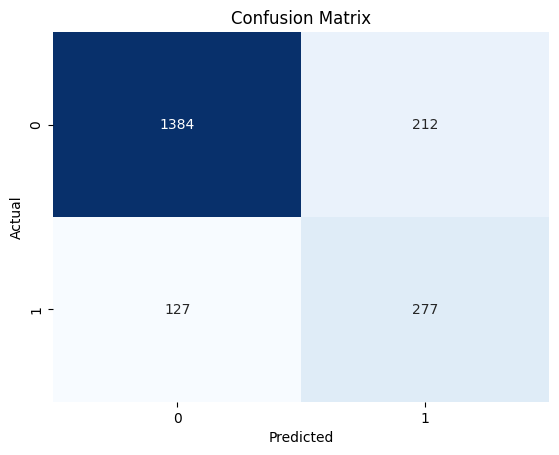

In [ ]:
conf_matrix = confusion_matrix(target_test, rf_test_pred_balanced)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

True Negatives (TN): These are customers who were correctly predicted as not churning. In your case, 1384 customers were correctly identified as not leaving the bank.

False Positives (FP): These are customers who were incorrectly predicted as churning when they actually didn't. In your case, 212 customers were incorrectly flagged as potential churners, which might lead to unnecessary retention efforts for these customers who were not intending to leave the bank.

False Negatives (FN): These are customers who were incorrectly predicted as not churning when they actually did. In your case, 127 customers were missed by the model, meaning the bank failed to identify them as potential churners, potentially leading to lost opportunities to intervene and retain these customers.

True Positives (TP): These are customers who were correctly predicted as churning. In your case, 277 customers were correctly identified as intending to leave the bank, allowing the bank to take proactive measures such as offering incentives or personalized services to retain them.

Overall, the confusion matrix gives you a clear picture of the model's performance in identifying churners, helping the bank to refine its strategies for customer retention and improve its overall customer relationship management efforts.

## 4. Conclusion

In the project to predict customer churn for Bank Beta, the initial logistic regression model fell short of the target F1 score of 0.59, prompting exploration of various techniques to improve model performance. Class weight balancing techniques were applied, including upsampled and downsampled approaches, followed by experimentation with decision trees and random forests.

Despite significant efforts, none of the initial models met the target F1 score. However, the random forest classifier with class weight balancing emerged as the most promising candidate, achieving an F1 score of 0.6356 and an ROC AUC of 0.7909 during training. Subsequent evaluation with the test dataset revealed further improvements, with an F1 score of 0.6204 and an ROC AUC of 0.7764.

The confusion matrix analysis provided insights into the model's performance, revealing areas of strength and areas for improvement. Notably, while the model accurately identified a considerable number of customers who were likely to remain with the bank (True Negatives), it also correctly flagged a significant portion of potential churners (True Positives). However, there were instances of both false positives and false negatives, indicating areas where the model's predictions were less accurate. These findings underscored the importance of ongoing refinement and optimization of the predictive model to enhance its effectiveness in identifying customers at risk of churning.

Overall, the project demonstrated a systematic approach to addressing the challenge of customer churn prediction, leveraging a combination of data exploration, model training, and evaluation techniques. The successful development of a predictive model with improved performance opens up opportunities for Bank Beta to implement targeted retention strategies, ultimately bolstering customer satisfaction and loyalty while minimizing attrition.